# Train a gesture recognition model for microcontroller (ESP32)

* clones the “Harry_Potter” repository from GitHub using the Git command-line tool.







In [7]:
# Clone the repository from GitHub
!git clone --depth 1 -q https://github.com/RAref/Harry_Potter
!cp -r Harry_Potter/Train-model train

* The provided code is to unzip a file named data.zip into a directory called train. This process extracts the data contained within the zip file and places it in the google colab content directory.


In [ ]:
# Extract the data into the train directory
!unzip  Harry_Potter/data/data.zip -d train

1. Data Preparation:
 -  The script reads gesture data from various files and organizes it into a structured format.
 - It creates a DataFrame (df) with columns for gesture labels, participant names, and accelerometer data (X, Y, and Z).
 - Negative samples are generated if there are not enough available.
 - The combined dataset includes data from different folders and individuals.

2. Visualization:
 - The code uses Seaborn to create scatter plots for each gesture label (wing, ring, slope) and participant name.
 - The X-axis represents time (t), and the Y-axes represent accelerometer data (X, Y, and Z).
 - These plots are displayed for visual analysis to understand how different gestures are recorded by various people.


/content/train


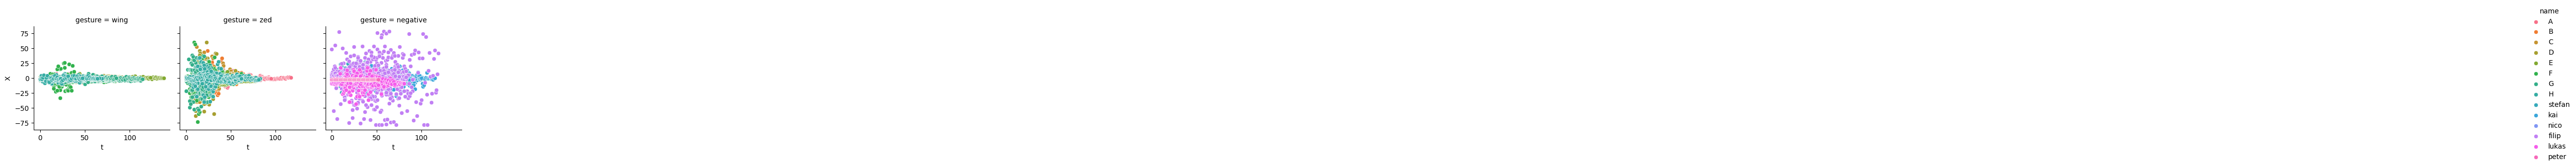

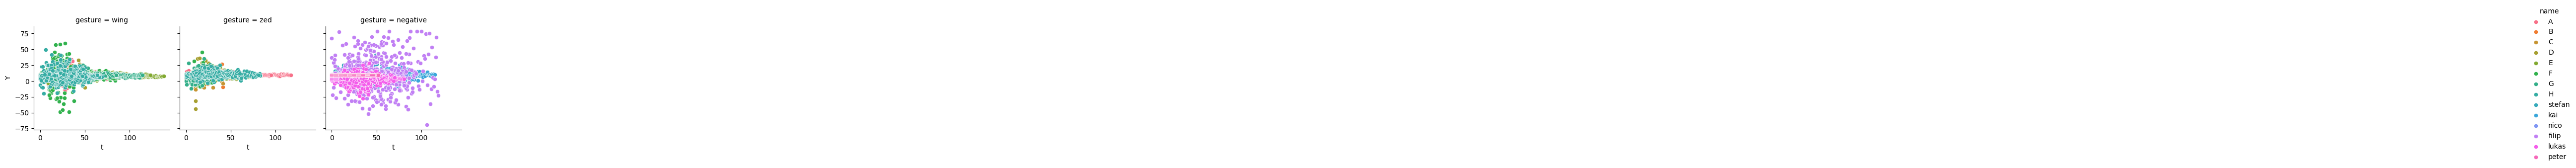

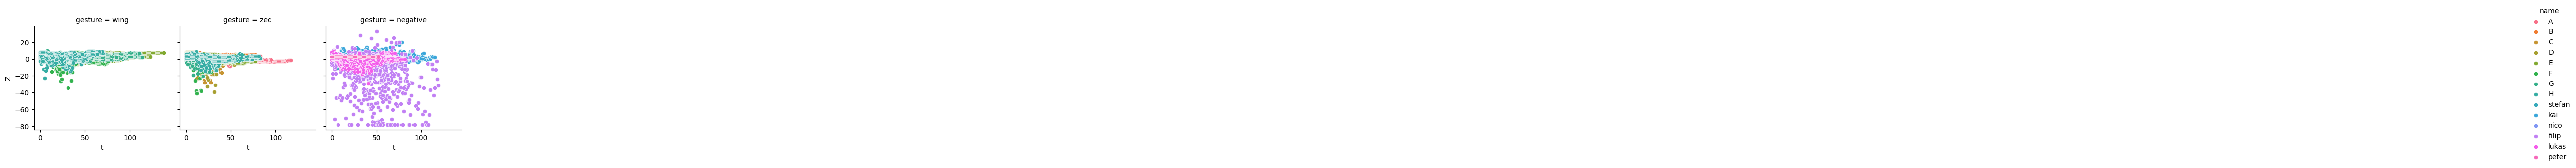

In [9]:
# The scripts must be run from within the train directory
%cd train
# Plot the data
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import math
from data_prepare import prepare_original_data
from data_prepare import generate_negative_data

LABEL_NAME = "gesture"
DATA_NAME = "accel_ms2_xyz"
# You Can Add Your new Magic here!
folders = ["wing", "zed",]
# Dont Forget To Add Your txt Magic File name here.
names = [
    "stefan",
    "patrick",
    "justin",
    "yeongmi"
    "arthur",
    "kai",
    "nico",
    "filip",
    "lukas",
    "peter",
    "A" ,
    "B" ,
    "C" ,
    "D",
    "E" ,
    "F",
    "G",
    "H"

]

data = []  # pylint: disable=redefined-outer-name
for idx1, folder in enumerate(folders):
  for idx2, name in enumerate(names):
    prepare_original_data(folder, name, data,
                          "./data/%s/output_%s_%s.txt" % (folder, folder, name))
n_gestures = len(data)
for idx, name in enumerate(names):
  prepare_original_data("negative", name, data,
                        "./data/negative/output_negative_%s.txt" % (name))
n_negative = len(data) - n_gestures
folders.append("negative")

# if there are more than 10% more gesture samples per gesture as negative samples, generate additional negative
# samples
if n_gestures - n_negative * len(folders) > n_gestures/len(folders) * 0.1:
  print("not enough negative samples available, creating random data samples")
  generate_negative_data(data, (math.ceil(n_gestures/len(folders)) - n_negative))
n_negative = len(data) - n_gestures

columns = [LABEL_NAME, "name", DATA_NAME]
df = pd.DataFrame(data, columns=columns)

df_gesture_data = pd.DataFrame()
for folder in folders:
  for row in df.loc[df[LABEL_NAME] == folder].iterrows():
    tmp_data = np.array(row[1][DATA_NAME])
    df_tmp = pd.DataFrame({
      "name": np.full(len(tmp_data), row[1]["name"]),
      LABEL_NAME: np.full(len(tmp_data), folder),
      "t": range(len(tmp_data)),
      "X": tmp_data[:, 0],
      "Y": tmp_data[:, 1],
      "Z": tmp_data[:, 2]
      })
    df_gesture_data = pd.concat([df_gesture_data, df_tmp], ignore_index=True)


grid_X = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_X.map(sb.scatterplot, "t", "X")
grid_X.add_legend()
grid_Y = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Y.map(sb.scatterplot, "t", "Y")
grid_Y.add_legend()
grid_Z = sb.FacetGrid(df_gesture_data, col = LABEL_NAME, hue = "name", col_wrap=len(names))
grid_Z.map(sb.scatterplot, "t", "Z")
grid_Z.add_legend()

plt.show()

#You Should Change A little bit these Two Python files to Add new Magic!.
1. Data Preparation:
 - The script data_prepare.py processes raw gesture data collected from a sensor. It organizes the data, performs necessary preprocessing, and prepares it for analysis or model training.
2. Data Splitting:
 - The script data_split.py handles splitting the data. Since only one person's data is available, it performs random splitting to create separate subsets for training, validation, and testing, ensuring better model generalization.



In [ ]:
# Prepare the data
!python data_prepare.py
!python data_split.py

* Model Training
#You Must Change The Train.py Source file for Model implemenatation and Traning Phase.#


In [ ]:
!python train.py --model CNN

## Create a C or h source file

The `train.py` script writes a model, `model.tflite`, to the training scripts' directory.

In the following cell, we convert this model into a C++ source file we can use with TensorFlow Lite for Microcontrollers.

In [ ]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C or h source file
!xxd -i model.tflite > /content/model.h
# Print the source file
!cat /content/model.h